Numerical variables
Categorical variables

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# let's load the dataset with just a few columns and a few rows
# to speed things up


data = pd.read_csv(
    '../datasets/loan.csv').sample(
        10000, random_state=44)  # set a seed for reproducibility

data.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
3472,3472,13925.0,14.0434,C,Teacher,<=5 years,RENT,54320.0,2012-07-08,0,Debt consolidation,23.0,2015-07-25,NaN
5095,5095,10000.0,5.5476,A,Dentist,<=5 years,MORTGAGE,46550.0,2013-03-04,0,Debt consolidation,5.0,2015-12-18,NaN
9504,9504,2790.0,14.8401,C,Taxi driver,>5 years,MORTGAGE,33633.6,2015-01-06,0,Other,9.0,2016-01-04,NaN
5786,5786,15216.0,17.1488,E,Bus driver,<=5 years,MORTGAGE,41710.0,2011-10-25,0,Other,11.0,2016-01-22,NaN
8758,8758,8190.0,11.8209,C,Dentist,<=5 years,RENT,48484.0,2014-10-04,0,Debt consolidation,12.0,2016-01-05,NaN


In [4]:
len(data.disbursed_amount.unique())

2522

Text(0, 0.5, 'Number of Loans')

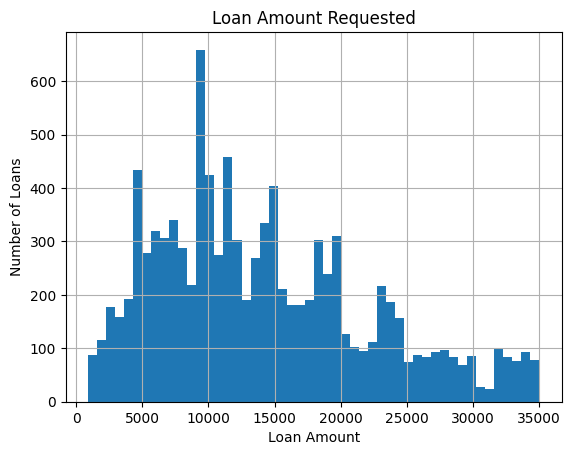

In [5]:
# make an histgram 

fig = data.disbursed_amount.hist(bins=50)
fig.set_title('Loan Amount Requested')
fig.set_xlabel('Loan Amount')
fig.set_ylabel('Number of Loans')

In [6]:
data.interest.unique()

array([14.0434,  5.5476, 14.8401, ...,  7.28  , 12.3556, 12.5364])

Text(0, 0.5, 'Number of Loans')

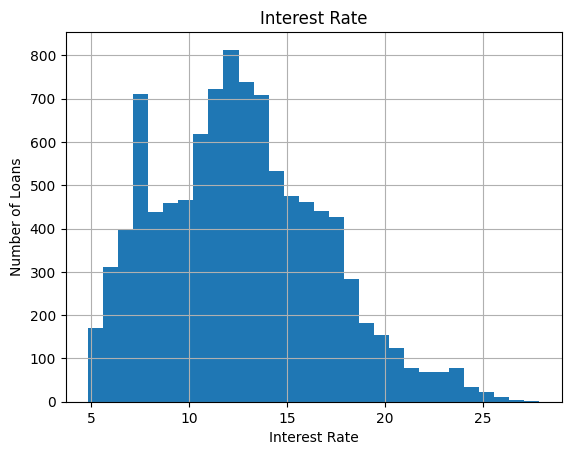

In [7]:
fig = data.interest.hist(bins=30)
fig.set_title('Interest Rate')
fig.set_xlabel('Interest Rate')
fig.set_ylabel('Number of Loans')

In [8]:
data['income'].unique()

array([ 54320.  ,  46550.  ,  33633.6 , ...,  58922.96, 145600.  ,
        29811.6 ])

Text(0, 0.5, 'Number of Customers')

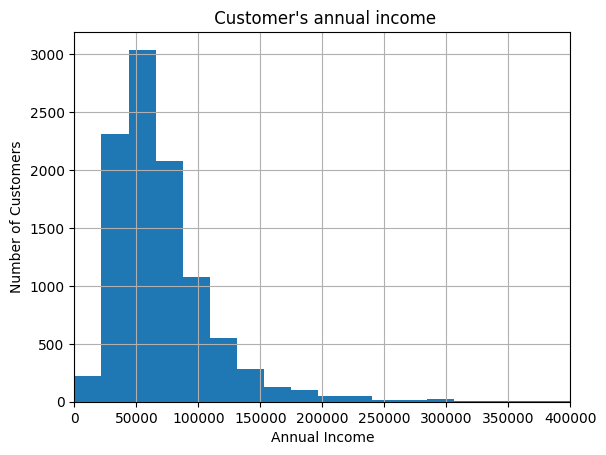

In [9]:
fig = data['income'].hist(bins=100)
fig.set_xlim(0, 400000)
fig.set_title(" Customer's annual income")
fig.set_xlabel('Annual Income')
fig.set_ylabel('Number of Customers')

## Discrete Variables

(0.0, 30.0)

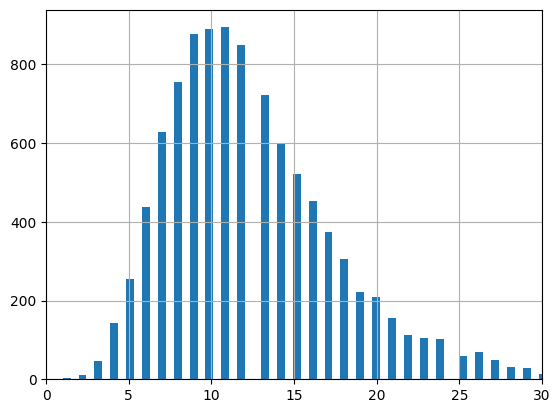

In [10]:
fig = data.number_open_accounts.hist(bins=100)
fig.set_xlim(0, 30)

In [11]:
data.target.unique()

array([0, 1])

In [12]:
data.loan_purpose.unique()

array(['Debt consolidation', 'Other', 'Home improvements', 'Car purchase',
       'Moving home', 'Health', 'Holidays', 'Wedding'], dtype=object)

In [25]:
data['Holidays'] = np.where(data.loan_purpose.isin(['Holidays']), 1, 0)

In [27]:
data.Holidays.mean()

0.0048

In [34]:
data = data.drop(['Holiday'], axis=1)

In [35]:
data.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12,Holidays
3472,3472,13925.0,14.0434,C,Teacher,<=5 years,RENT,54320.0,2012-07-08,0,Debt consolidation,23.0,2015-07-25,NaN,0
5095,5095,10000.0,5.5476,A,Dentist,<=5 years,MORTGAGE,46550.0,2013-03-04,0,Debt consolidation,5.0,2015-12-18,NaN,0
9504,9504,2790.0,14.8401,C,Taxi driver,>5 years,MORTGAGE,33633.6,2015-01-06,0,Other,9.0,2016-01-04,NaN,0
5786,5786,15216.0,17.1488,E,Bus driver,<=5 years,MORTGAGE,41710.0,2011-10-25,0,Other,11.0,2016-01-22,NaN,0
8758,8758,8190.0,11.8209,C,Dentist,<=5 years,RENT,48484.0,2014-10-04,0,Debt consolidation,12.0,2016-01-05,NaN,0


In [36]:
data[data.loan_purpose.isin(['Holidays'])].head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12,Holidays
6876,6876,7760.0,14.5173,D,Bus driver,<=5 years,RENT,52800.0,2015-10-24,0,Holidays,17.0,2015-12-11,NaN,1
1083,1083,4800.0,7.6167,A,Teacher,>5 years,RENT,71250.0,2015-01-06,0,Holidays,11.0,2016-01-09,NaN,1
7569,7569,4900.0,9.3799,B,Other,<=5 years,RENT,56400.0,2014-04-03,0,Holidays,16.0,2016-01-10,NaN,1
4607,4607,3040.0,12.0807,C,Taxi driver,>5 years,MORTGAGE,72000.0,2015-01-16,0,Holidays,4.0,2016-01-12,NaN,1
3675,3675,10741.5,16.5900,D,Teacher,<=5 years,MORTGAGE,97000.0,2014-03-04,0,Holidays,11.0,2016-01-13,NaN,1


## df.isin()

In [38]:
df = pd.DataFrame({'num_legs': [2, 4], 'num_wings': [2, 0]}, index = ['falcon', 'dog'])

In [39]:
df

,num_legs,num_wings
falcon,2,2
dog,4,0


In [40]:
df.isin([0, 2])

,num_legs,num_wings
falcon,True,True
dog,False,True


In [41]:
# To check if values is not in the DataFrame, use the ~ operator:

~df.isin([0, 2])

,num_legs,num_wings
falcon,False,False
dog,True,False


In [42]:
df.isin({'num_wings': [0, 3]})

,num_legs,num_wings
falcon,False,False
dog,False,True


In [44]:
other = pd.DataFrame({'num_legs': [8, 3], 'num_wings': [0, 2]},
                     index=['spider', 'falcon'])
other

,num_legs,num_wings
spider,8,0
falcon,3,2


In [46]:
df

,num_legs,num_wings
falcon,2,2
dog,4,0


In [45]:
df.isin(other)

,num_legs,num_wings
falcon,False,True
dog,False,False


-- end --